1. Importando Bibliotecas Necessárias

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
arquivo = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

# Exibir as primeiras linhas do dataframe
arquivo.head()


,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE


Análise Inicial

In [107]:
# Verificando a quantidade de linhas e colunas
print(f"Total de registros: {arquivo.shape[0]}")  # Quantidade de linhas
print(f"Total de colunas: {arquivo.shape[1]}")    # Quantidade de colunas


Total de registros: 902676
Total de colunas: 18


Distribuição de Cursos por Categoria Administrativa e Região

CATEGORIA_ADMINISTRATIVA,Especial,Privada com fins lucrativos,Privada sem fins lucrativos,Pública Estadual,Pública Federal,Pública Municipal
REGIAO,,,,,,
CENTRO-OESTE,0,66706,10255,888,1731,238
IGNORADO/EXTERIOR,0,422,186,0,0,0
NORDESTE,170,181656,12922,3566,4305,349
NORTE,0,72654,6942,1152,1890,132
SUDESTE,176,281872,56189,3082,4010,2526
SUL,437,158144,25529,1292,2866,389


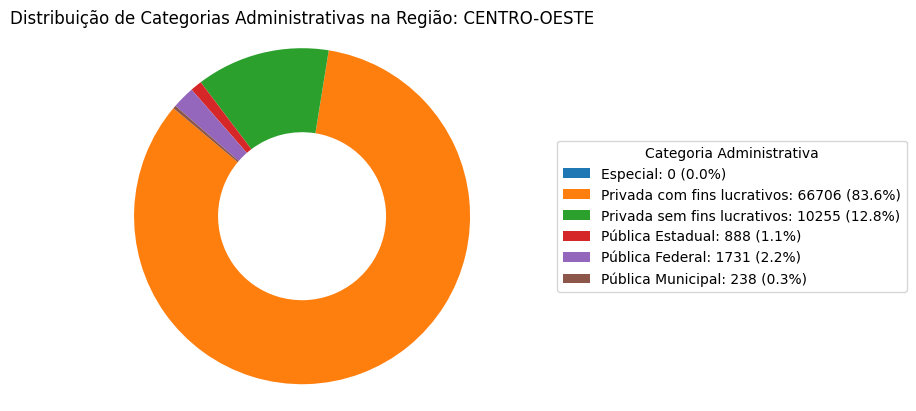

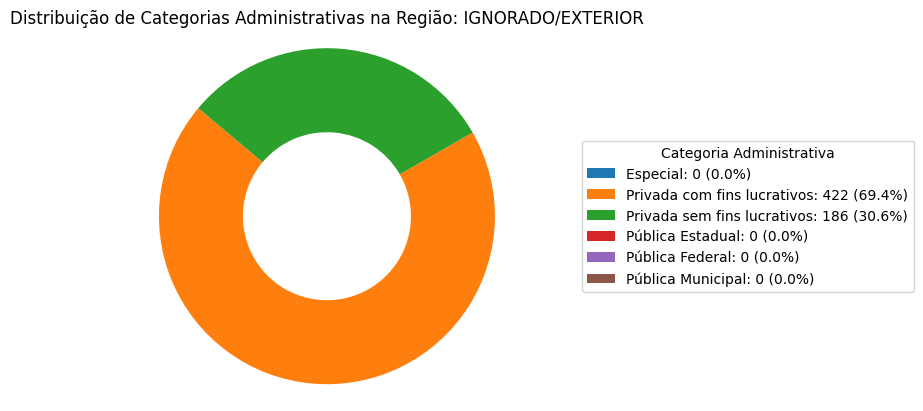

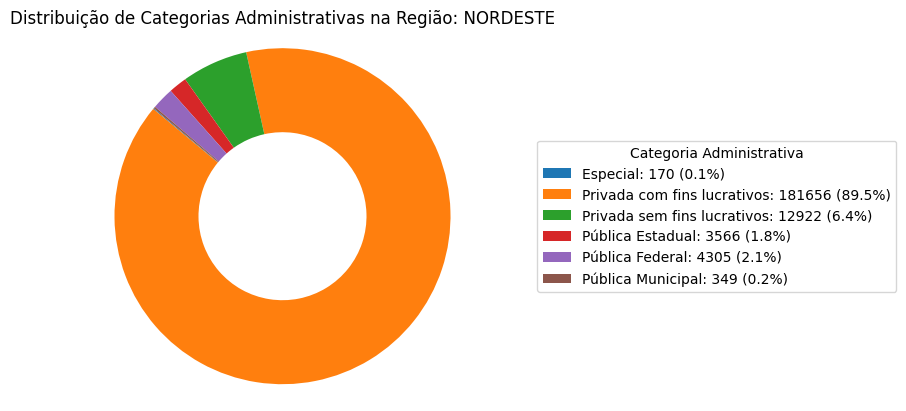

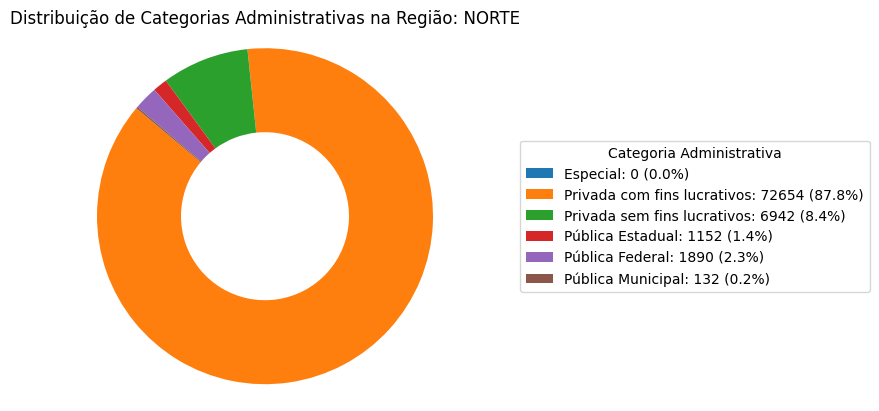

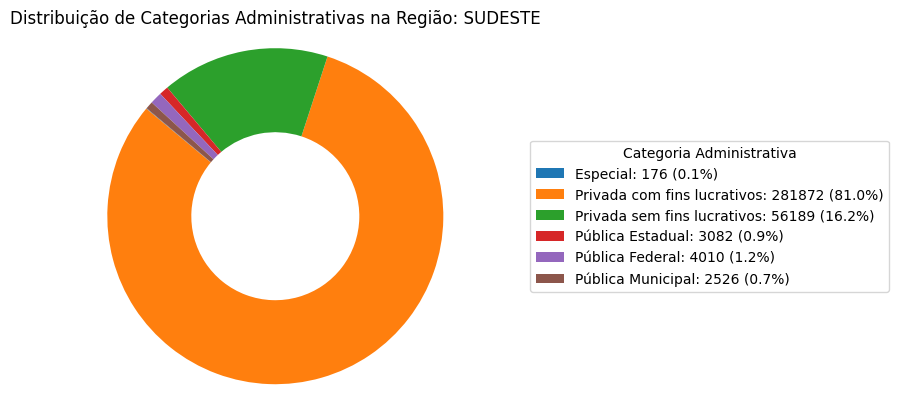

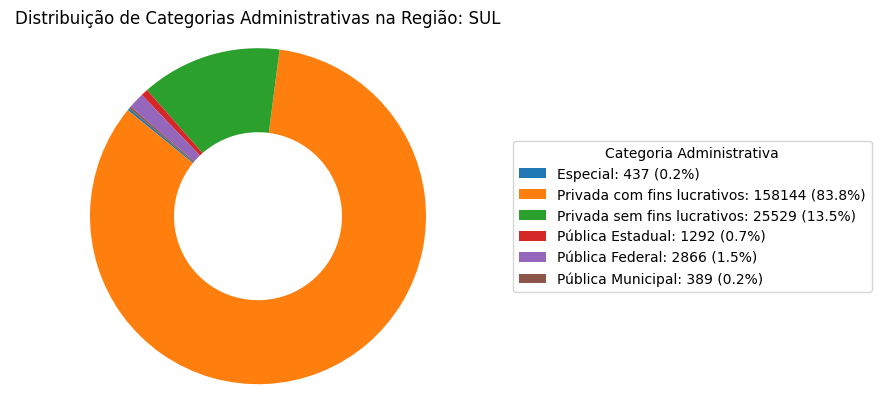

In [91]:
# Tabela cruzada entre categoria administrativa e região
categoria_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['CATEGORIA_ADMINISTRATIVA'])

# Exibindo a tabela
display(categoria_regiao)
regioes = ('CENTRO_OESTE', 'IGNORADO_EXTERIOR', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL')
x = 0

# Gerando gráficos de pizza para cada região
for regiao in categoria_regiao.index:
    
    # Calcula os valores e percentuais para a legenda
    valores = categoria_regiao.loc[regiao]
    total = sum(valores)
    legend_labels = [f'{cat}: {val} ({val/total:.1%})' for cat, val in zip(categoria_regiao.columns, valores)]
    
    # Criando o gráfico de pizza sem rótulos internos
    wedges, texts = plt.pie(
        valores,
        startangle=140,
        wedgeprops=dict(width=0.5)  # Largura da fatia para clareza
    )

    # Adicionando a legenda ao lado
    plt.legend(wedges, legend_labels, title="Categoria Administrativa", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Distribuição de Categorias Administrativas na Região: {regiao}')
    plt.axis('equal')  # Para garantir que o gráfico de pizza seja um círculo
    plt.savefig(f"Gráfico_Categorias_Adm_Região_{regioes[x]}.png", bbox_inches='tight')
    x += 1
    plt.show()

Análise da Distribuição de Cursos por Região

REGIAO
SUDESTE              347855
NORDESTE             202968
SUL                  188657
NORTE                 82770
CENTRO-OESTE          79818
IGNORADO/EXTERIOR       608
Name: count, dtype: int64

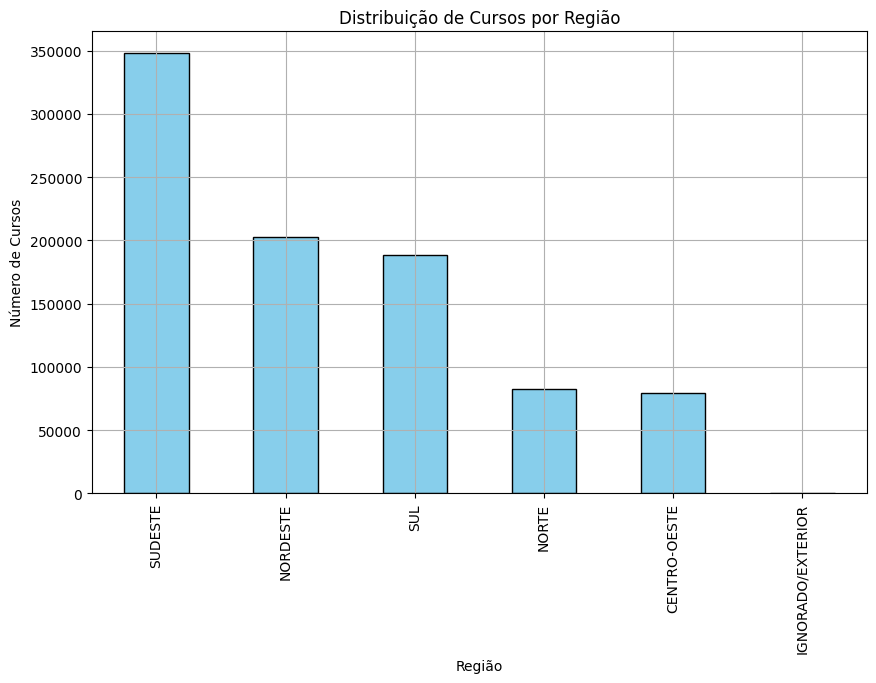

In [92]:
# Contagem de cursos por região
cursos_por_regiao = arquivo['REGIAO'].value_counts()

display(cursos_por_regiao)

# Gráfico de barras
plt.figure(figsize=(10, 6))

cursos_por_regiao.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Cursos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.grid()
plt.savefig(f"Gráfico_Cursos_por_Região.png", bbox_inches='tight')
plt.show()


Distribuição das vagas autorizadas por região

REGIAO
SUDESTE              2333028227
NORDESTE             1218963125
SUL                   944563809
NORTE                 637651691
CENTRO-OESTE          620100529
IGNORADO/EXTERIOR       5854628
Name: QT_VAGAS_AUTORIZADAS, dtype: int64

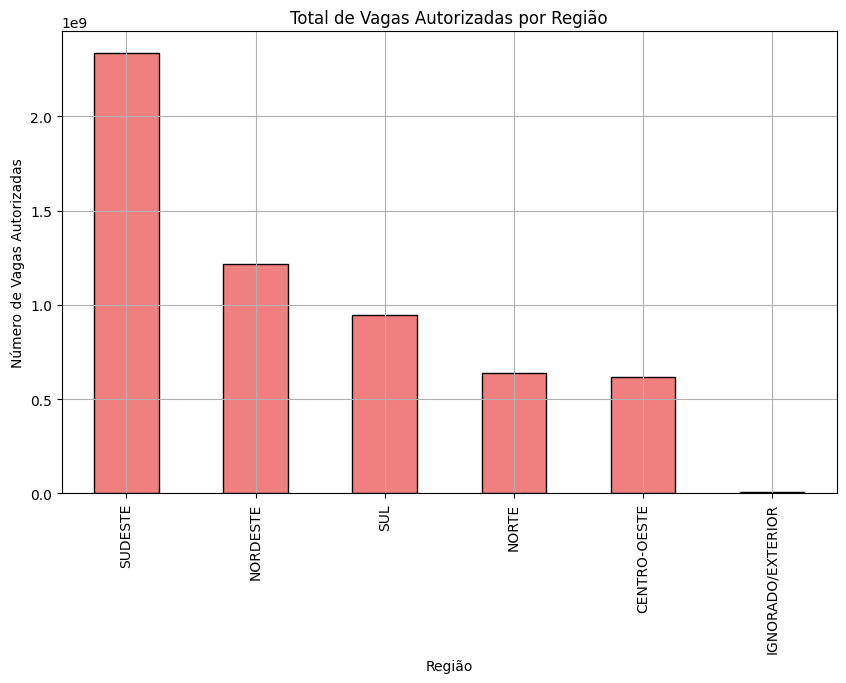

In [93]:
# Agrupando por região e somando as vagas autorizadas
vagas_por_regiao = arquivo.groupby('REGIAO')['QT_VAGAS_AUTORIZADAS'].sum().sort_values(ascending=False)

display(vagas_por_regiao)

# Gráfico de barras
plt.figure(figsize=(10, 6))

vagas_por_regiao.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Total de Vagas Autorizadas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Vagas Autorizadas')
plt.grid()
plt.savefig("Gráfico_Vagas_por_Região.png", bbox_inches='tight')
plt.show()


Analisando a Modalidade de Ensino por Região

MODALIDADE,Educação Presencial,Educação a Distância
REGIAO,,
CENTRO-OESTE,6880,72938
IGNORADO/EXTERIOR,0,608
NORDESTE,14891,188077
NORTE,5514,77256
SUDESTE,32349,315506
SUL,13003,175654


<Figure size 1000x600 with 0 Axes>

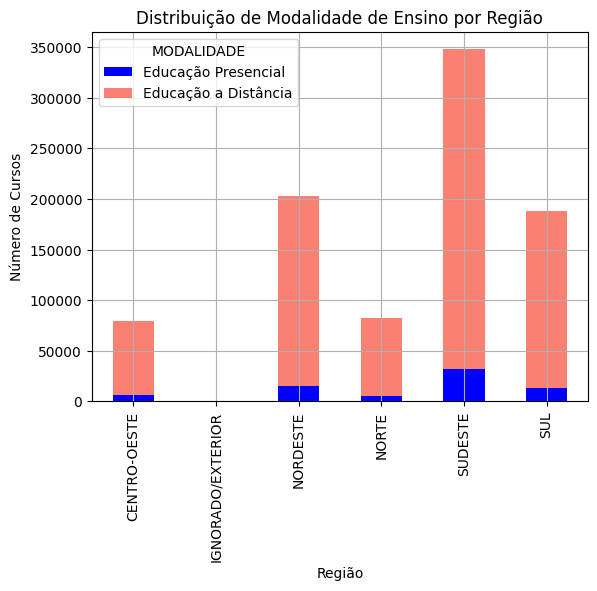

In [108]:
# Tabela cruzada entre modalidade e região
modalidade_por_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['MODALIDADE'])

display(modalidade_por_regiao)

# Gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

modalidade_por_regiao.plot(kind='bar', stacked=True, color=['blue', 'salmon'])
plt.title('Distribuição de Modalidade de Ensino por Região')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.grid()
plt.savefig("Gráfico_Modalidade_por_Região.png", bbox_inches='tight')
plt.show()


Analisando Modalidade de Ensino

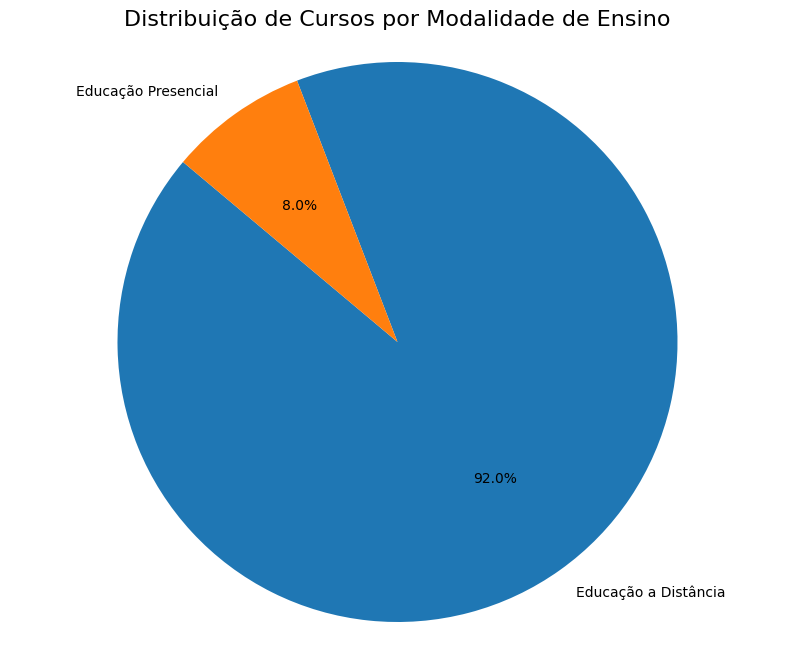

In [95]:
# Contagem de cursos por modalidade
modalidade_ensino = arquivo['MODALIDADE'].value_counts()

# Visualizando a distribuição com gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(
    modalidade_ensino.values, 
    labels=modalidade_ensino.index, 
    autopct='%1.1f%%', 
    startangle=140,
)
plt.title('Distribuição de Cursos por Modalidade de Ensino', fontsize=16)
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.savefig("Gráfico_Modalidade_Ensino.png", bbox_inches='tight')
plt.show()

Comparando a Carga Horária Média por Região e Categoria Administrativa

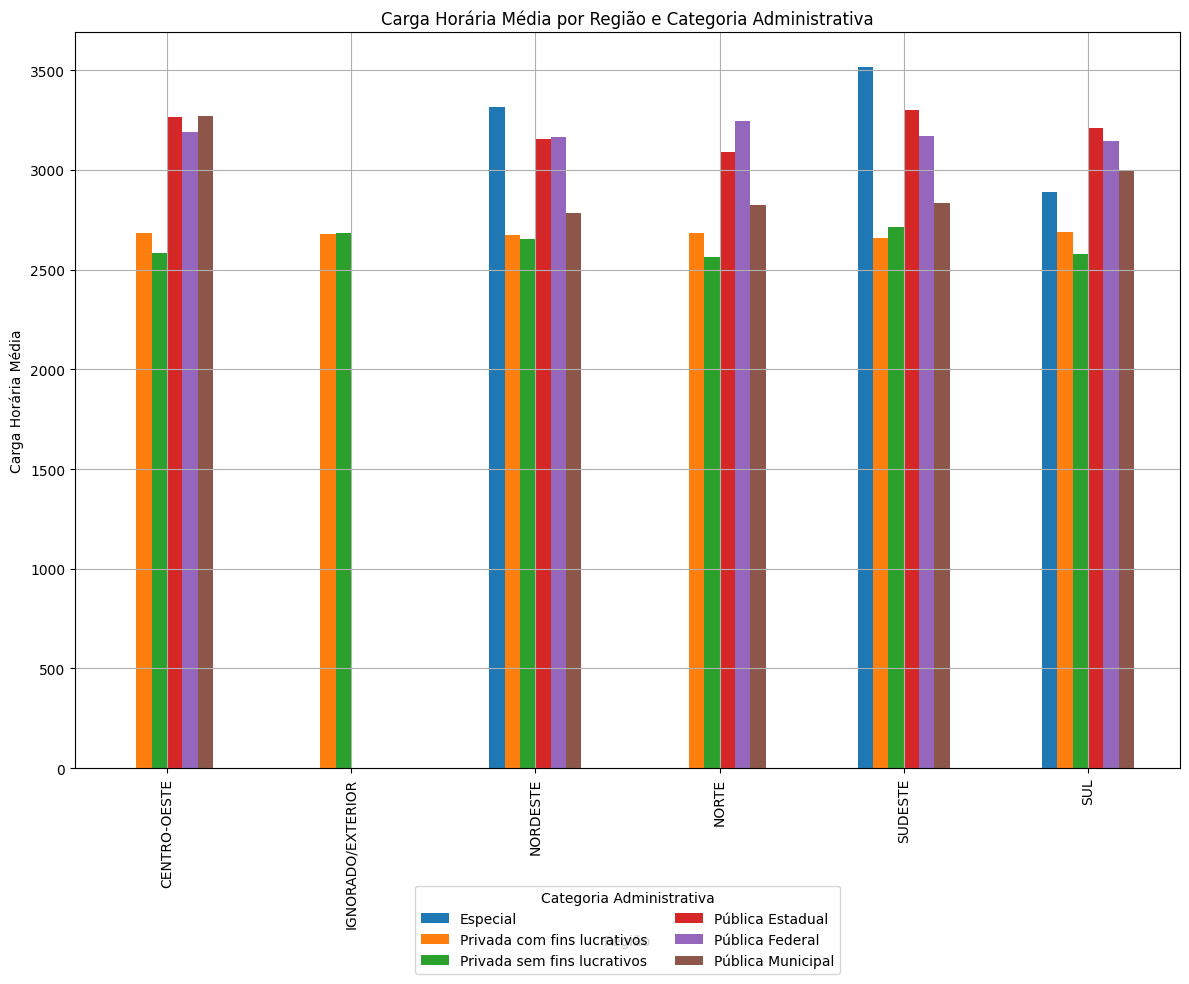

In [96]:
# Média de carga horária por região e categoria administrativa
carga_horaria_media = arquivo.groupby(['REGIAO', 'CATEGORIA_ADMINISTRATIVA'])['CARGA_HORARIA'].mean().unstack()

# Visualizando a distribuição
ax = carga_horaria_media.plot(kind='bar', figsize=(12, 10))

# Título e rótulos dos eixos
plt.title('Carga Horária Média por Região e Categoria Administrativa')
plt.xlabel('Região')
plt.ylabel('Carga Horária Média')

# Posicionando a legenda na parte inferior
plt.legend(title='Categoria Administrativa', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
plt.tight_layout()  # Ajusta o layout para acomodar a legenda
plt.grid()
plt.savefig("Gráfico_Carga_Horaria_por_Região.png", bbox_inches='tight')
plt.show()


Distribuição de Cursos por Modalidade e Categoria Administrativa

MODALIDADE,Educação Presencial,Educação a Distância
CATEGORIA_ADMINISTRATIVA,,
Especial,474,309
Privada com fins lucrativos,31911,729543
Privada sem fins lucrativos,22104,89919
Pública Estadual,7354,2626
Pública Federal,9981,4821
Pública Municipal,813,2821


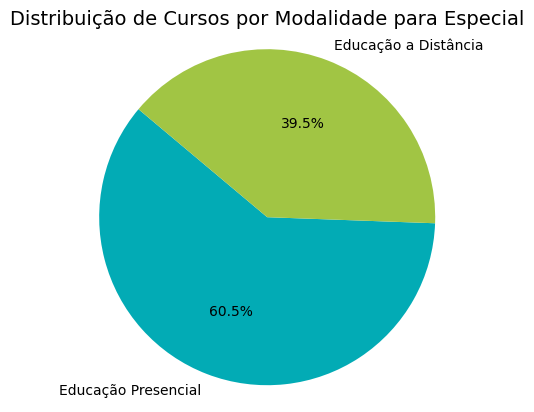

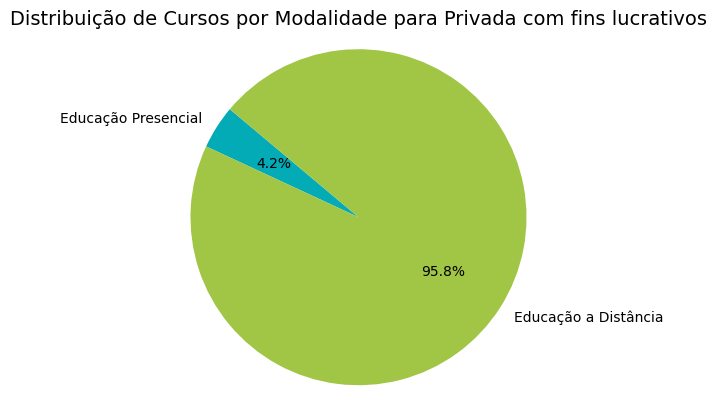

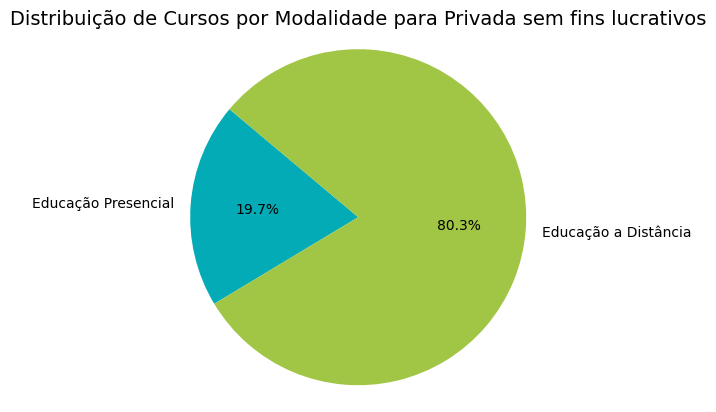

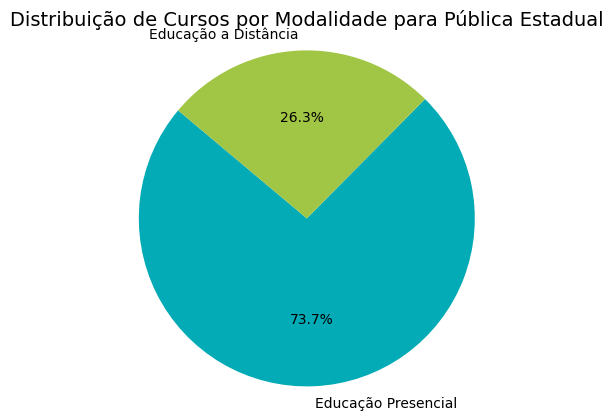

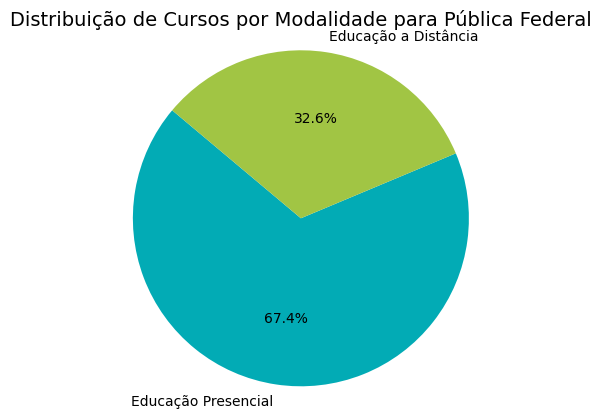

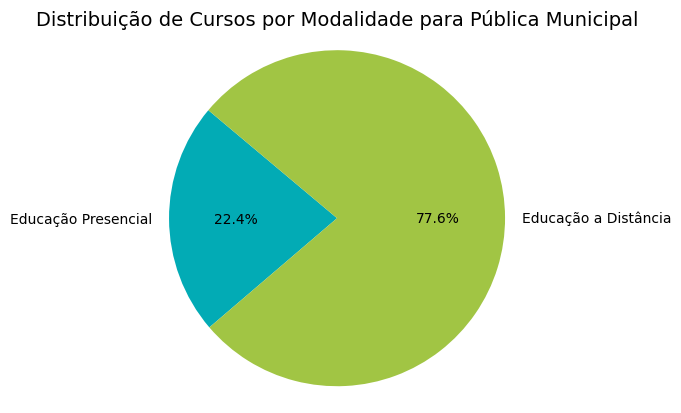

In [106]:
# Tabela cruzada entre modalidade e categoria administrativa
modalidade_categoria = pd.crosstab(arquivo['CATEGORIA_ADMINISTRATIVA'], arquivo['MODALIDADE'])

# Exibindo a tabela
display(modalidade_categoria)

# Gerando gráficos de pizza para cada categoria administrativa
for categoria in modalidade_categoria.index:
    # Dados para o gráfico de pizza
    valores = modalidade_categoria.loc[categoria]
    
    # Criando o gráfico de pizza
    plt.pie(
        valores, 
        labels=valores.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#02ABB5', '#A1C544']
    )
    
    # Título do gráfico
    plt.title(f'Distribuição de Cursos por Modalidade para {categoria}', fontsize=14)
    plt.axis('equal')  # Assegura que o gráfico seja um círculo
    
    plt.savefig(f"Gráfico_Modalidade_para_{categoria}.png", bbox_inches='tight')
    plt.show()

Proporção de Categorias Administrativas por Região

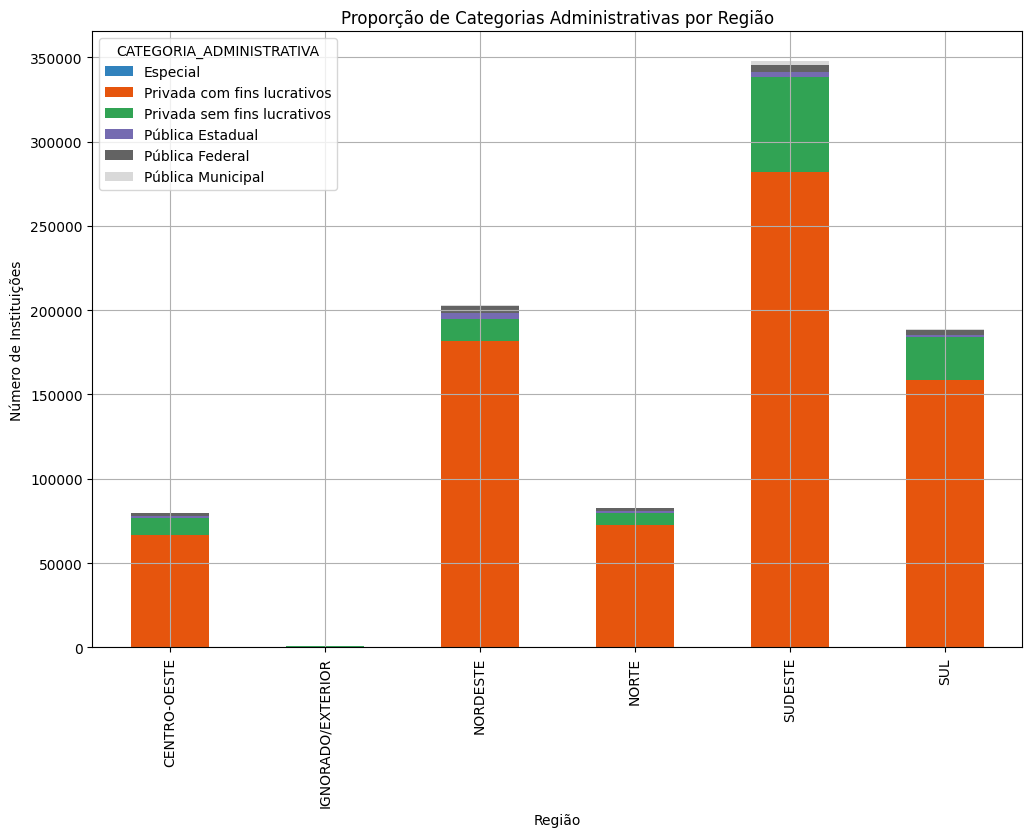

In [98]:
# Proporção de categorias administrativas por região
categorias_por_regiao = arquivo.groupby(['REGIAO', 'CATEGORIA_ADMINISTRATIVA']).size().unstack()

# Visualizando a distribuição
categorias_por_regiao.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Proporção de Categorias Administrativas por Região')
plt.xlabel('Região')
plt.ylabel('Número de Instituições')
plt.grid()
plt.savefig("Gráfico_Categorias_por_Região.png", bbox_inches='tight')
plt.show()

Tabela da Distribuição de Cursos por Grau (Bacharelado, Licenciatura, Tecnológico)

GRAU,Bacharelado,Licenciatura,Sequencial,Tecnológico,Área Básica de Ingresso (ABI)
REGIAO,,,,,
CENTRO-OESTE,23091,16120,69,40484,54
IGNORADO/EXTERIOR,176,122,0,310,0
NORDESTE,58266,41059,81,103517,45
NORTE,23149,16907,15,42685,14
SUDESTE,101545,71017,282,174714,297
SUL,53499,36042,129,98883,104


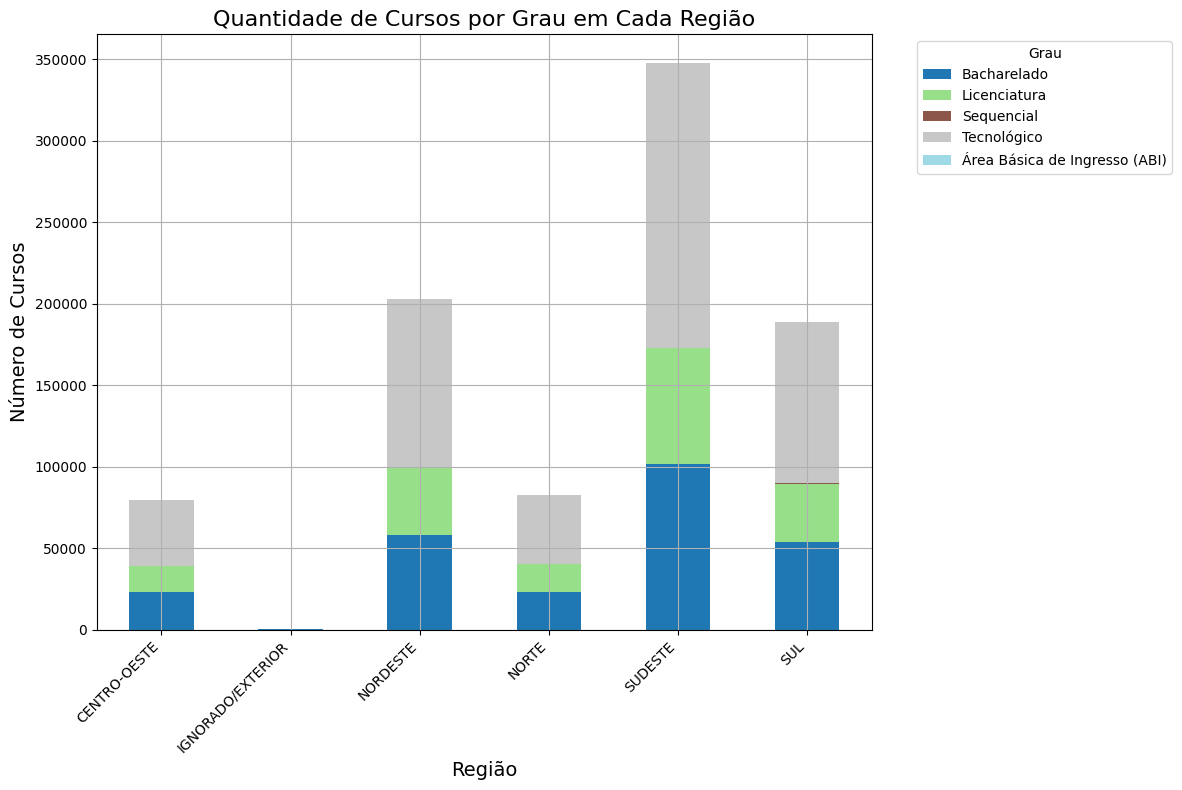

In [99]:
# Tabela cruzada entre grau e região
grau_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['GRAU'])

# Exibindo a tabela
display(grau_regiao)

# Tabela cruzada entre grau e região
grau_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['GRAU'])

# Gerando gráfico de barras empilhadas
grau_regiao.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Título e rótulos dos eixos
plt.title('Quantidade de Cursos por Grau em Cada Região', fontsize=16)
plt.xlabel('Região', fontsize=14)
plt.ylabel('Número de Cursos', fontsize=14)

# Legenda
plt.legend(title='Grau', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.savefig("Gráfico_Grau_por_Região.png", bbox_inches='tight')
plt.show()


Agrupando por região e grau e calculando a carga horária média

In [100]:

carga_horaria_media_grau_regiao = arquivo.groupby(['REGIAO', 'GRAU'])['CARGA_HORARIA'].mean().unstack()

# Exibindo a tabela
display(carga_horaria_media_grau_regiao)


GRAU,Bacharelado,Licenciatura,Sequencial,Tecnológico,Área Básica de Ingresso (ABI)
REGIAO,,,,,
CENTRO-OESTE,3479.036551,3349.434243,1660.768116,1977.578698,2159.833333
IGNORADO/EXTERIOR,3486.960227,3367.860656,NaN,1956.354839,NaN
NORDESTE,3490.075447,3372.699140,1809.185185,1977.101906,2529.555556
NORTE,3500.123245,3382.181404,1903.666667,1984.103151,2760.500000
SUDESTE,3467.308858,3315.229579,1905.531915,1966.440606,1851.481481
SUL,3523.194004,3400.636063,1351.736434,1973.090511,2111.500000


Carga Horária Média dos Cursos por grau e região

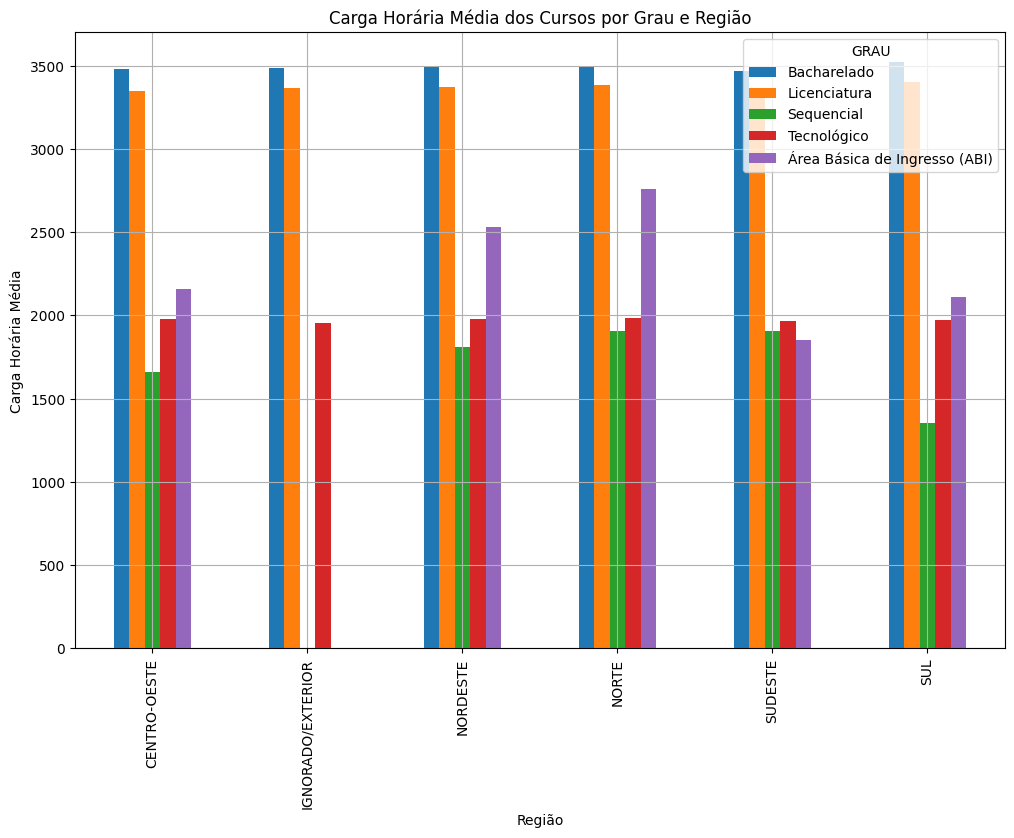

In [101]:
# Média de carga horária por grau e região
carga_horaria_media_grau = arquivo.groupby(['REGIAO', 'GRAU'])['CARGA_HORARIA'].mean().unstack()

# Visualizando a distribuição
carga_horaria_media_grau.plot(kind='bar', figsize=(12, 8))
plt.title('Carga Horária Média dos Cursos por Grau e Região')
plt.xlabel('Região')
plt.ylabel('Carga Horária Média')
plt.grid()
plt.savefig("Gráfico_Carga_Horaria_por_Grau.png", bbox_inches='tight')
plt.show()

In [102]:
# Tabela cruzada entre área de conhecimento OCDE e região
area_ocde_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['AREA_OCDE_CINE'])

# Exibindo a tabela
display(area_ocde_regiao)


AREA_OCDE_CINE,ABI Artes e humanidades,"ABI Ciências naturais, matemática e estatística","ABI Ciências sociais, comunicação e informação",ABI Computação e Tecnologias da Informação e Comunicação (TIC),ABI Educação,"ABI Engenharia, produção e construção",ABI Saúde e bem-estar,ABI Serviços,Acústica,Administração,...,Tributação,Turismo,Técnicas de irrigação e drenagem,Urbanismo,Uso da internet,Vendas em varejo,Vitrines,Zoologia,Zootecnia,Ética
REGIAO,,,,,,,,,,,,,,,,,,,,,
CENTRO-OESTE,0,0,0,1,1,0,0,0,0,2096,...,1,80,1,0,775,0,0,0,55,1
IGNORADO/EXTERIOR,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,4,0,0,0,0,0
NORDESTE,5,0,1,1,5,1,0,1,0,5097,...,0,172,12,1,1853,0,0,0,42,0
NORTE,0,0,0,0,0,0,0,0,0,1896,...,0,43,0,0,717,1,0,0,27,0
SUDESTE,5,5,2,0,1,3,2,0,0,9315,...,4,328,5,0,3210,0,1,1,66,0
SUL,3,0,0,0,0,0,0,0,1,4617,...,0,124,1,0,2068,0,0,0,151,0


Tabela de Cursos em Atividade e Extintos Geral e por Região


SITUACAO_CURSO,Em atividade,Em extinção,Extinto
REGIAO,,,
CENTRO-OESTE,75331,745,3742
IGNORADO/EXTERIOR,592,1,15
NORDESTE,194187,1416,7365
NORTE,79383,765,2622
SUDESTE,324727,5349,17779
SUL,178700,1986,7971


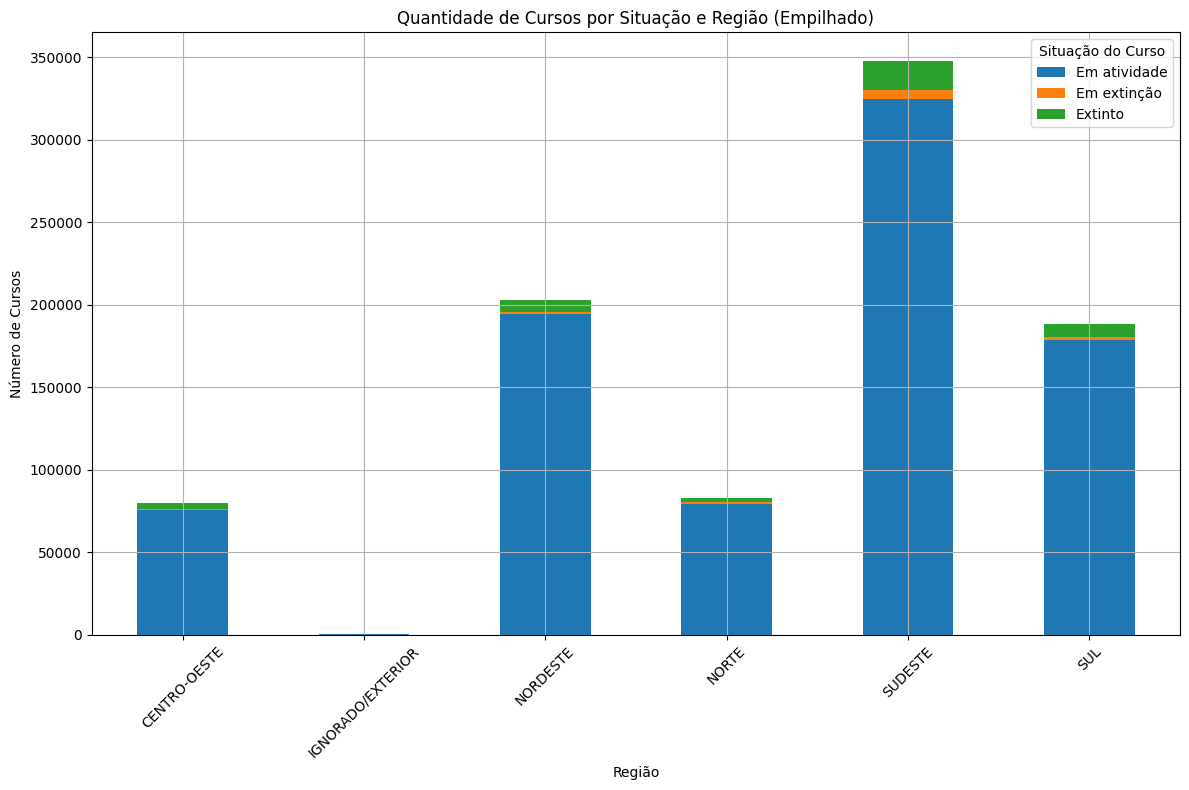

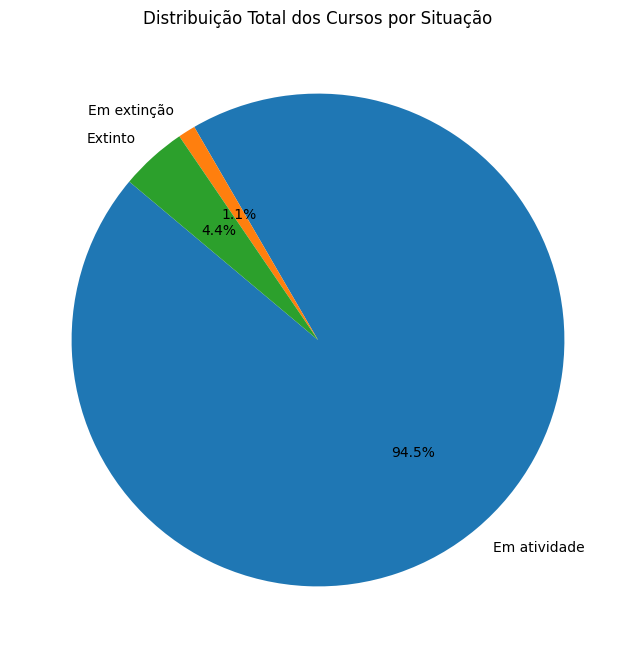

In [103]:
# Tabela cruzada entre situação do curso e região
situacao_regiao = pd.crosstab(arquivo['REGIAO'], arquivo['SITUACAO_CURSO'])

# Exibindo a tabela
display(situacao_regiao)

situacao_regiao.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Quantidade de Cursos por Situação e Região (Empilhado)')
plt.xlabel('Região')
plt.ylabel('Número de Cursos')
plt.xticks(rotation=45)
plt.legend(title='Situação do Curso')
plt.tight_layout()
plt.grid()
plt.savefig("Gráfico_Situacao_por_Região.png", bbox_inches='tight')
plt.show()

# Agregando os dados por situação
total_por_situacao = situacao_regiao.sum()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(total_por_situacao, labels=total_por_situacao.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Total dos Cursos por Situação')
plt.savefig("Gráfico_Situacao_Cursos.png", bbox_inches='tight')
plt.show()